##### Visualisierung der globalen Migrationsmuster
##### Diese Analyse untersucht die globalen Migrationstrends und
##### Bevölkerungsentwicklungen in verschiedenen Ländern
##### ===============================================

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from pathlib import Path

#### Plot-Einstellungen

In [90]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'
sns.set_palette("husl")

#### **1. Daten laden**

##### 1.1 Verfügbare Dateien prüfen

In [91]:
data_path = Path('../data')
print("Verfügbare CSV-Dateien:")
for file in data_path.glob('*.csv'):
    print(f"- {file.name}")

Verfügbare CSV-Dateien:
- processed_world_pop_mig_186_countries.csv
- analyzed_correlation_matrix.csv
- analyzed_yearly_metrics.csv
- analyzed_top_emigration.csv
- analyzed_top_immigration.csv
- analyzed_migration_distribution.csv
- world_pop_mig_186_countries.csv
- analyzed_country_metrics.csv
- analyzed_top_population.csv


##### 1.2 Hauptdatensatz

In [92]:
df = pd.read_csv(data_path / 'processed_world_pop_mig_186_countries.csv')

##### 1.3 Analysierte Daten laden

In [93]:
top_immigration = pd.read_csv(data_path / 'analyzed_top_immigration.csv')
top_emigration = pd.read_csv(data_path / 'analyzed_top_emigration.csv')
yearly_metrics = pd.read_csv(data_path / 'analyzed_yearly_metrics.csv')
top_population = pd.read_csv(data_path / 'analyzed_top_population.csv')
country_metrics = pd.read_csv(data_path / 'analyzed_country_metrics.csv')

#### **2. Top Migration Muster**
# ---------------------

In [94]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

#### Top Immigration

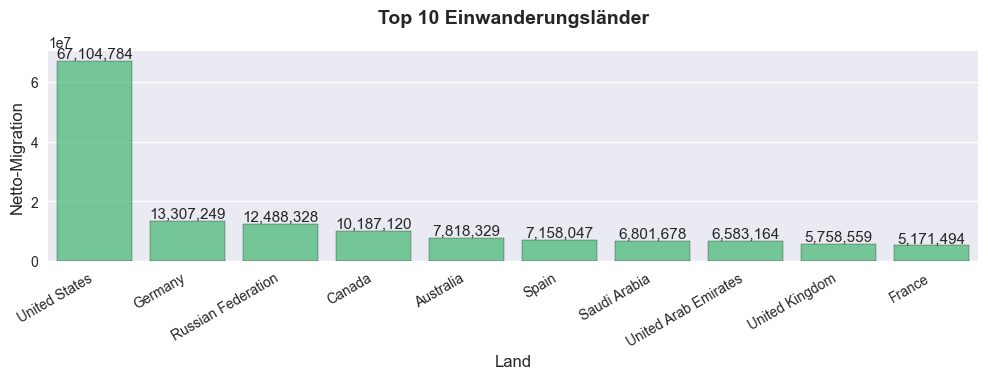

In [95]:
plt.subplot(2, 1, 1)
ax1 = sns.barplot(data=top_immigration, x='country', y='netMigration', 
                color='#2ecc71', edgecolor='black', alpha=0.7)
plt.title('Top 10 Einwanderungsländer', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Land', fontsize=12)
plt.ylabel('Netto-Migration', fontsize=12)
plt.xticks(rotation=30, ha='right')

# Werte über den Balken anzeigen
for i, v in enumerate(top_immigration['netMigration']):
   ax1.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

#### Top Emigration

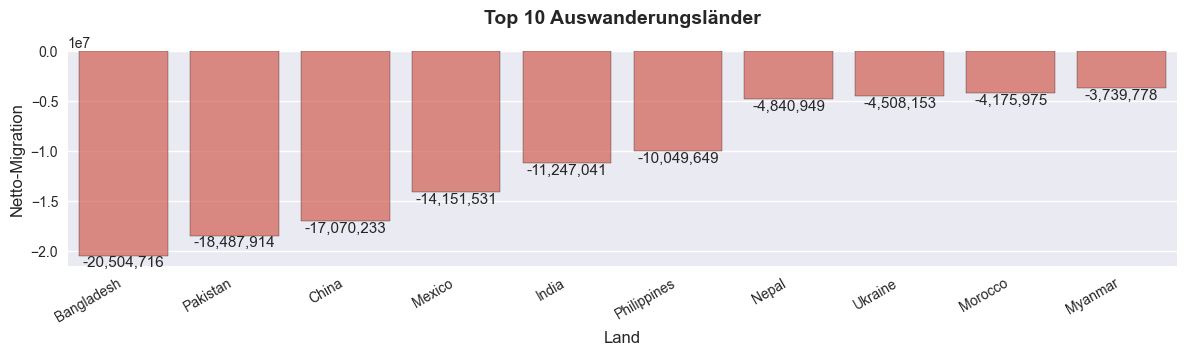

In [96]:
plt.subplot(2, 1, 2)
ax2 = sns.barplot(data=top_emigration, x='country', y='netMigration', 
                color='#e74c3c', edgecolor='black', alpha=0.7)
plt.title('Top 10 Auswanderungsländer', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Land', fontsize=12)
plt.ylabel('Netto-Migration', fontsize=12)
plt.xticks(rotation=30, ha='right')

# Werte über den Balken anzeigen
for i, v in enumerate(top_emigration['netMigration']):
   ax2.text(i, v, f'{v:,.0f}', ha='center', va='top')

plt.tight_layout()
plt.show()

#### **3. Zeitliche Entwicklung**

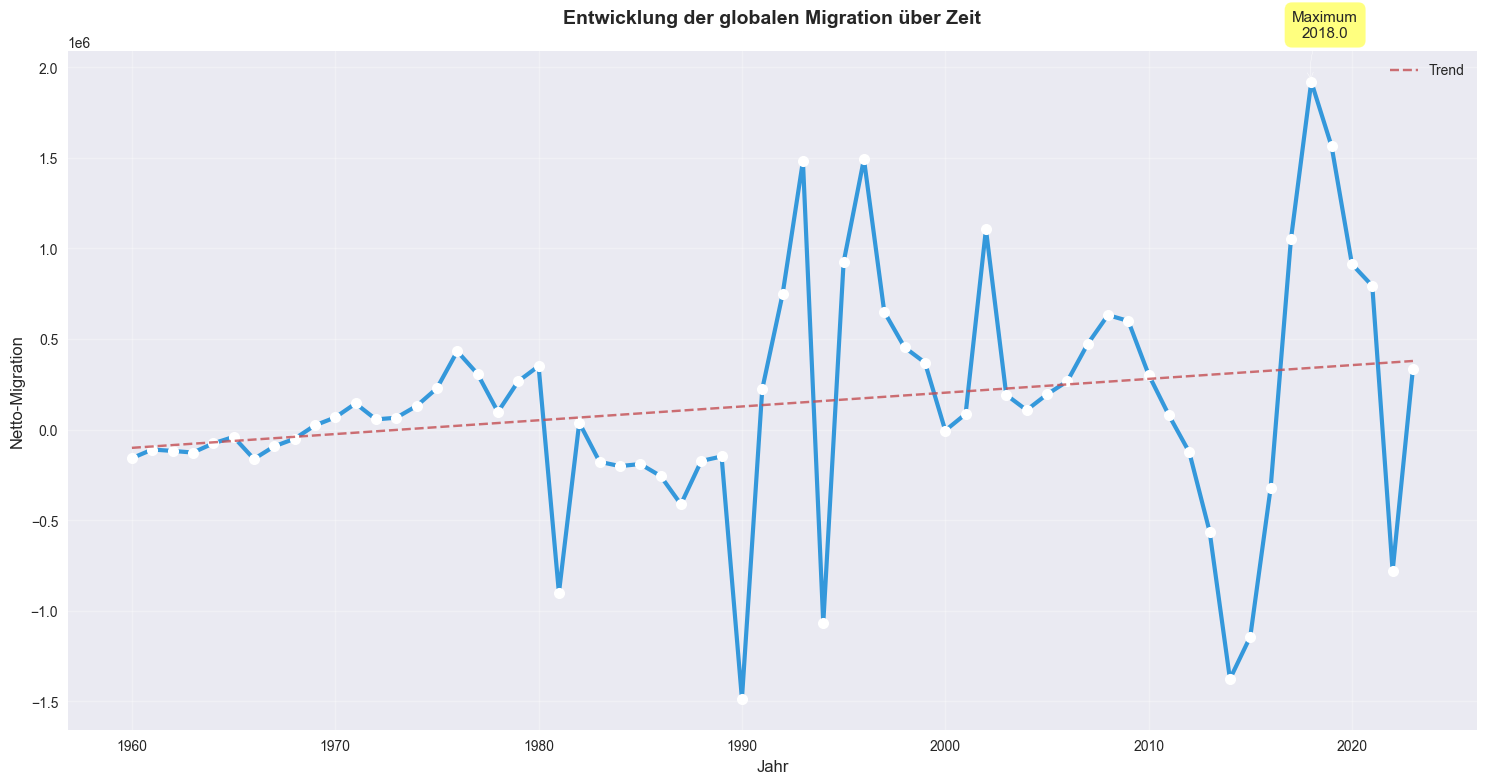

In [97]:
plt.figure(figsize=(15, 8))
plt.plot(yearly_metrics['year'], yearly_metrics['netMigration'], 
        marker='o', linewidth=3, color='#3498db', 
        markersize=8, markerfacecolor='white')

# Trend hinzufügen
z = np.polyfit(yearly_metrics['year'], yearly_metrics['netMigration'], 1)
p = np.poly1d(z)
plt.plot(yearly_metrics['year'], p(yearly_metrics['year']), 
        "r--", alpha=0.8, label='Trend')

plt.title('Entwicklung der globalen Migration über Zeit', 
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Netto-Migration', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Wichtige Jahre markieren
max_year = yearly_metrics.loc[yearly_metrics['netMigration'].idxmax()]
plt.annotate(f'Maximum\n{max_year["year"]}', 
           xy=(max_year['year'], max_year['netMigration']),
           xytext=(10, 30), textcoords='offset points',
           ha='center', va='bottom',
           bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

plt.tight_layout()
plt.show()


#### **4. Top 10 Bevölkerungsreichste Länder**

/var/folders/v8/sjdmnzl54fn3997hxg94053r0000gn/T/ipykernel_2999/2885176951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_population, x='country', y='population',


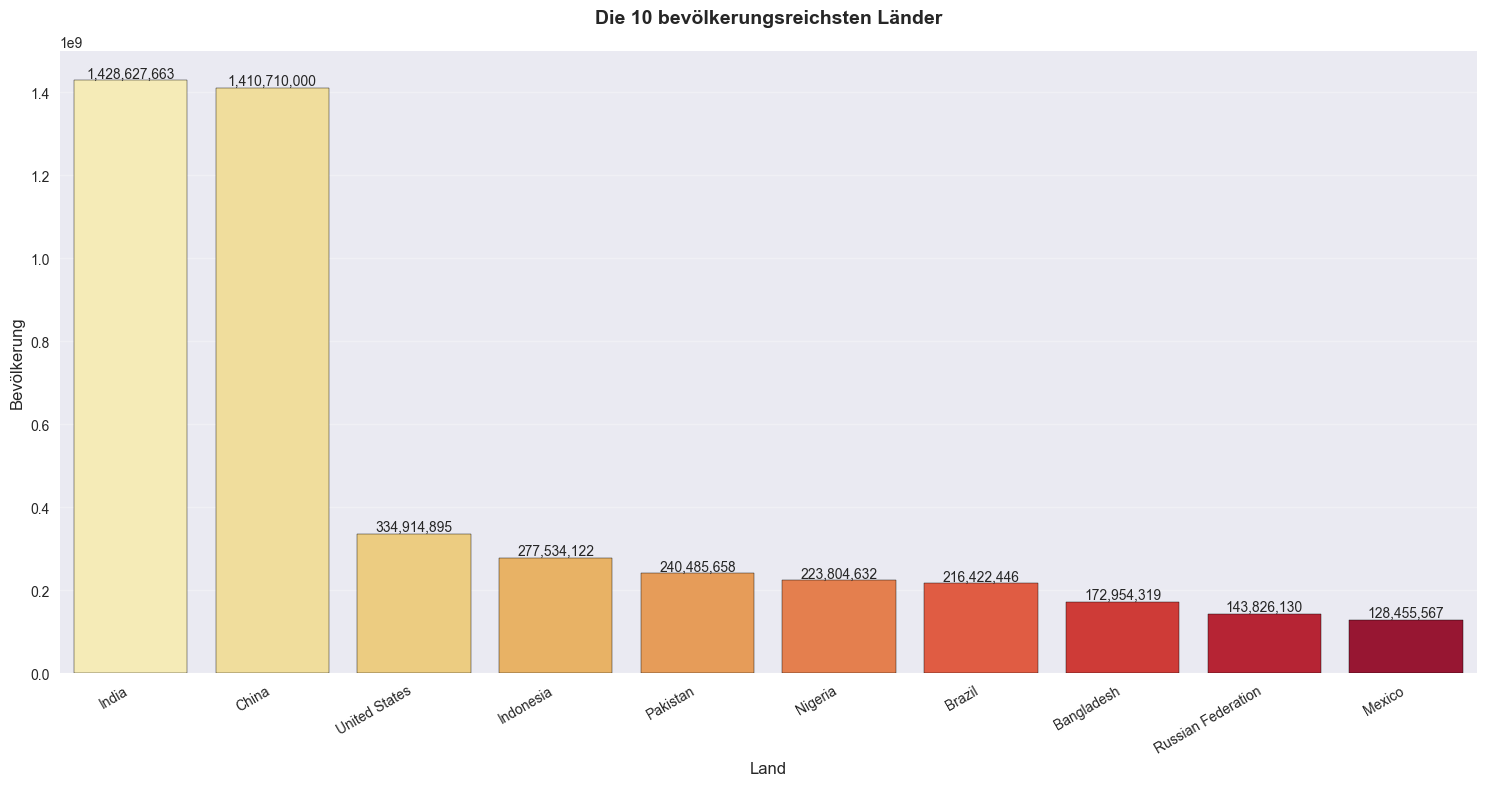

In [98]:
plt.figure(figsize=(15, 8))
colors = sns.color_palette("YlOrRd", n_colors=len(top_population))
ax = sns.barplot(data=top_population, x='country', y='population',
               palette=colors, edgecolor='black')

plt.title('Die 10 bevölkerungsreichsten Länder', 
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Land', fontsize=12)
plt.ylabel('Bevölkerung', fontsize=12)
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(top_population['population']):
   ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### **5. Korrelationsanalyse**

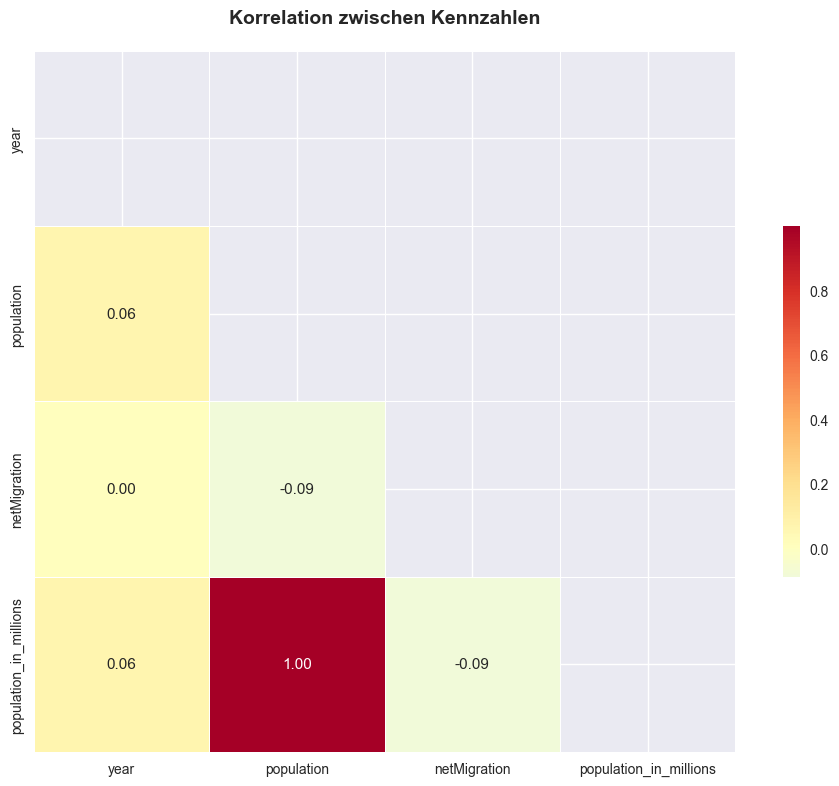

In [99]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='RdYlBu_r', 
           center=0, fmt='.2f', square=True, linewidths=0.5,
           cbar_kws={"shrink": .5})

plt.title('Korrelation zwischen Kennzahlen', 
         fontsize=14, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

#### **6. Zusammenfassung und Erkenntnisse**

In [100]:
print("\n=== Haupterkenntnisse der Analyse ===")
print("\n1. Migrationsmuster:")
print(f"• Stärkstes Einwanderungsland: {top_immigration['country'].iloc[0]}")
print(f"  mit {top_immigration['netMigration'].iloc[0]:,.0f} Netto-Zuwanderern")
print(f"• Stärkstes Auswanderungsland: {top_emigration['country'].iloc[0]}")
print(f"  mit {top_emigration['netMigration'].iloc[0]:,.0f} Netto-Auswanderern")

print("\n2. Bevölkerungsentwicklung:")
print(f"• Bevölkerungsreichstes Land: {top_population['country'].iloc[0]}")
print(f"  mit {top_population['population'].iloc[0]:,.0f} Einwohnern")

print("\n3. Zeitliche Entwicklung:")
print(f"• Analysezeitraum: {yearly_metrics['year'].min()} bis {yearly_metrics['year'].max()}")
year_max = yearly_metrics.loc[yearly_metrics['netMigration'].idxmax(), 'year']
print(f"• Jahr mit höchster Netto-Migration: {year_max}")


=== Haupterkenntnisse der Analyse ===

1. Migrationsmuster:
• Stärkstes Einwanderungsland: United States
  mit 67,104,784 Netto-Zuwanderern
• Stärkstes Auswanderungsland: Bangladesh
  mit -20,504,716 Netto-Auswanderern

2. Bevölkerungsentwicklung:
• Bevölkerungsreichstes Land: India
  mit 1,428,627,663 Einwohnern

3. Zeitliche Entwicklung:
• Analysezeitraum: 1960 bis 2023
• Jahr mit höchster Netto-Migration: 2018
